TensorFlow Introduction

**0.1 Install TensorFlow**


TensorFlow is a software library extensively used in machine learning. Here we'll learn how computations are represented and how to define a simple neural network in TensorFlow. For all the TensorFlow labs in Introduction to Deep Learning 2025, we'll be using TensorFlow 2, which affords great flexibility and the ability to imperatively execute operations, just like in Python. You'll notice that TensorFlow 2 is quite similar to Python in its syntax and imperative execution. Let's install TensorFlow and a couple of dependencies.

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.3/682.3 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.8/786.8 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 6.4 MB/s eta 0:00:00


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


**1.1 Why is TensorFlow called TensorFlow?**

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data structures that you can think of as multi-dimensional arrays. Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer -- they provide a way to generalize vectors and matrices to higher dimensions.

The shape of a Tensor defines its number of dimensions and the size of each dimension. The rank of a Tensor provides the number of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.

In [2]:
#Let's first look at 0-d Tensors, of which a scalar is an example
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


In [3]:
#Vectors and lists can be used to create 1-d Tensors:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


Next we consider creating 2-d (i.e., matrices) and higher-rank Tensors. For examples, in future labs involving image processing and computer vision, we will use 4-d Tensors. Here the dimensions correspond to the number of example images in our batch, image height, image width, and the number of color channels.

In [4]:
# Defining higher-order Tensors
matrix=tf.constant([[1,2,3,4,5,6]])

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [5]:
images=tf.random.uniform([10,256,256,3])

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"


As you have seen, the shape of a Tensor provides the number of elements in each Tensor dimension. The shape is quite useful, and we'll use it often. You can also use slicing to access subtensors within a higher-rank Tensor:

In [7]:
row_vector = matrix[0]
column_vector = matrix[:,1]
scalar = matrix[0, 1]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [1 2 3 4 5 6]
`column_vector`: [2]
`scalar`: 2


**1.2 Computations on Tensors**

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order

In [9]:
#Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


In [10]:
# Construct a simple computation function
def func(a,b):

  c=a+b
  d=b-1
  e=c*d
  return e

In [11]:
# Consider example values for a,b
a, b = 1.5, 2.5

# Execute the computation
e_out = func(a,b)
print(e_out)

6.0


1.3 Neural networks in **TensorFlow**

We can also define neural networks in TensorFlow. TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

Let's first consider the example of a simple perceptron defined by just one dense layer: y=(sigma)*(Wx+B)
, where

 W:-represents a matrix of weights,

 B:-is a bias,

 x:-is the input,

 sigma:-is the sigmoid activation function, and

 y:-is the output.

In [16]:
# Defining a network Layer

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self,n_output_nodes):
    super(OurDenseLayer,self).__init__()
    self.n_output_nodes=n_output_nodes

  def build(self,input_shape):
    d=int(input_shape[-1])
    self.W=self.add_weight(name="weight", shape=[d,self.n_output_nodes])
    self.b=self.add_weight(name="bias", shape=[1,self.n_output_nodes])

  def call(self,x):
    z=tf.linalg.matmul(x, self.W)
    y=tf.sigmoid(z + self.b)
    return y

In [17]:
# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.keras.utils.set_random_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.27064407 0.1826951  0.50374055]]
[PASS] test_custom_dense_layer_output


True

Conveniently, TensorFlow has defined a number of **Layers** that are commonly used in neural networks, for example a Dense. Now, instead of using a single Layer to define our simple neural network, we'll use the **Sequential** model from Keras and a single Dense layer to define our network. With the **Sequential** API, you can readily create neural networks by stacking together layers like building blocks.

In [19]:
# Import relevant packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :)
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(n_output_nodes, activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)

In [20]:
# Create some sample input data (e.g., a batch of 2 inputs with 5 features each)
# The number of features should match the input shape the dense layer expects.
# Since we didn't specify an input shape in the Dense layer, Keras will infer it from the first input.
# Let's assume an input shape of (batch_size, 2) based on the previous custom layer example.
sample_input = tf.constant([[1., 2.], [3., 4.]], shape=(2, 2))

# Pass the sample input through the model
output_data = model.predict(sample_input)

# Print the output
print("Input data:\n", sample_input.numpy())
print("\nOutput data:\n", output_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Input data:
 [[1. 2.]
 [3. 4.]]

Output data:
 [[0.82794297 0.15568398 0.567044  ]
 [0.95743424 0.01141495 0.4818623 ]]


**1.4 Automatic differentiation in TensorFlow**

Automatic differentiation is one of the most important parts of TensorFlow and is the backbone of training with backpropagation. We will use the TensorFlow GradientTape tf.GradientTape to trace operations for computing gradients later.

When a forward pass is made through the network, all forward-pass operations get recorded to a "tape"; then, to compute the gradient, the tape is played backwards. By default, the tape is discarded after it is played backwards; this means that a particular **tf.GradientTape** can only compute one gradient, and subsequent calls throw a runtime error. However, we can compute multiple gradients over the same computation by creating a **persistent** gradient tape.

In [21]:
# Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how **GradientTape** can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of L=(x-x_f)square
. Here
 x_f:-is a variable for a desired value we are trying to optimize for;

 l:-represents a loss that we are trying to minimize.
While we can clearly solve this problem analytically (x_min=x_f), considering how we can compute this using GradientTape sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=[[-0.39749843]]


Text(0, 0.5, 'x value')

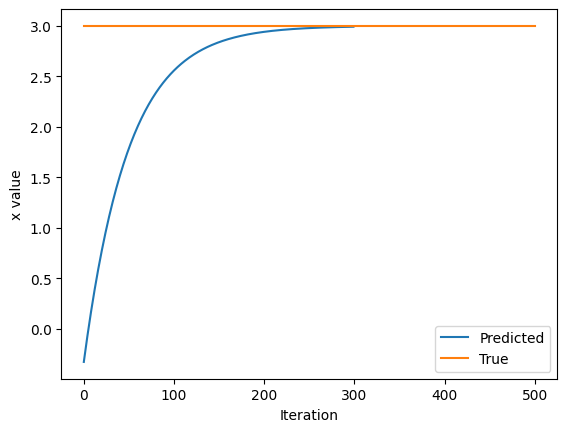

In [32]:
# Function minimization with automatic differentiation and SGD ###

# Initialize a random value for our initial x
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
x_f = 3

# We will run SGD for a number of iterations. At each iteration, we compute the loss,
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(300):
  with tf.GradientTape() as tape:
    '''TODO: define the loss as described above'''
    loss = (x-x_f)**2

  # loss minimization using gradient tape
  grad = tape.gradient(loss, x) # compute the derivative of the loss with respect to x
  new_x = x - learning_rate*grad # sgd update
  x.assign(new_x) # update the value of x
  history.append(x.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
